In [240]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams['figure.dpi']=150
plt.rcParams['font.size']=16

In [241]:
def cost_func(theta):
    return np.sin(2*theta) + np.sin(theta) - 3

def daoham(theta):
    return 2*np.cos(2*theta) + np.cos(theta)

def gra_desent(start_theta, learning_rate, nguongdung):
    theta= start_theta
    theta_his=[theta]
    cost_his=[cost_func(theta)]
    while True:
        theta=theta-(learning_rate * daoham(theta))
        theta_his.append(theta)
        cost_his.append(cost_func(theta))
        if abs(daoham(theta))<nguongdung:
            break
    return theta_his, cost_his


In [242]:
theta=np.linspace(-10,10,400)

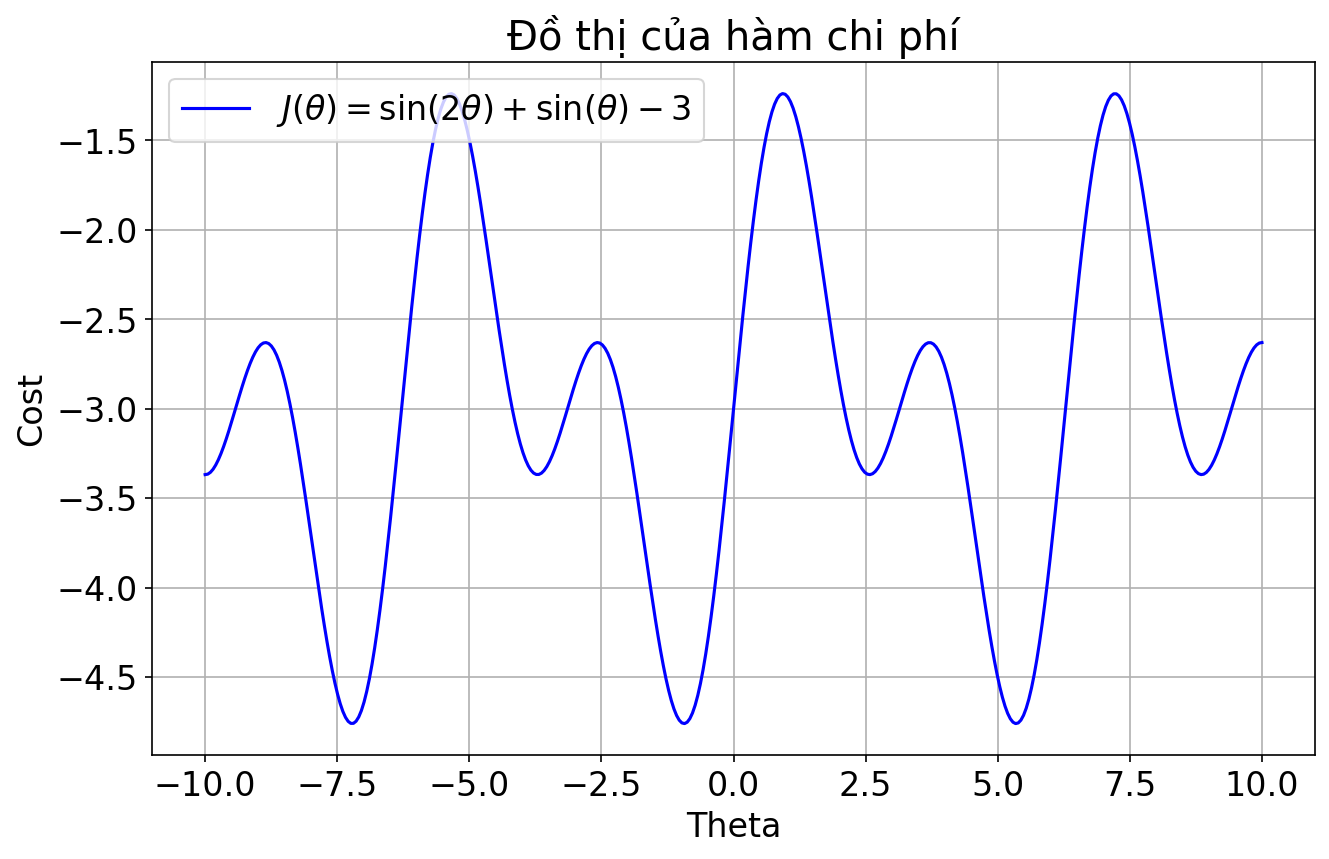

In [243]:
# Vẽ đồ thị hàm chi phí
plt.figure(figsize=(10, 6))
plt.plot(theta, cost_func(theta), label='$J(\\theta)=\sin(2\\theta) + \sin(\\theta) - 3$', color='b')
plt.xlabel('Theta')
plt.ylabel('Cost')
plt.title('Đồ thị của hàm chi phí')
plt.legend()
plt.grid(True)
plt.show()

In [244]:
# Parameters
learning_rate = 0.01
nguongdung = 1e-8
num_of_random_start_theta = 5
theta_range = (-10, 10)
results = []

# Perform gradient descent from multiple random starting points
for _ in range(num_of_random_start_theta):
    start_theta = np.random.uniform(*theta_range)
    theta_his, cost_his = gra_desent(start_theta, learning_rate, nguongdung)
    results.append((theta_his, cost_his))

# Find the best result based on the final cost value
best_result = min(results, key=lambda x: x[1][-1])
best_theta_his, best_cost_his = best_result

# Evaluate the cost function over a range of theta values
theta = np.linspace(-10, 10, 400)
cost_values = [cost_func(t) for t in theta]

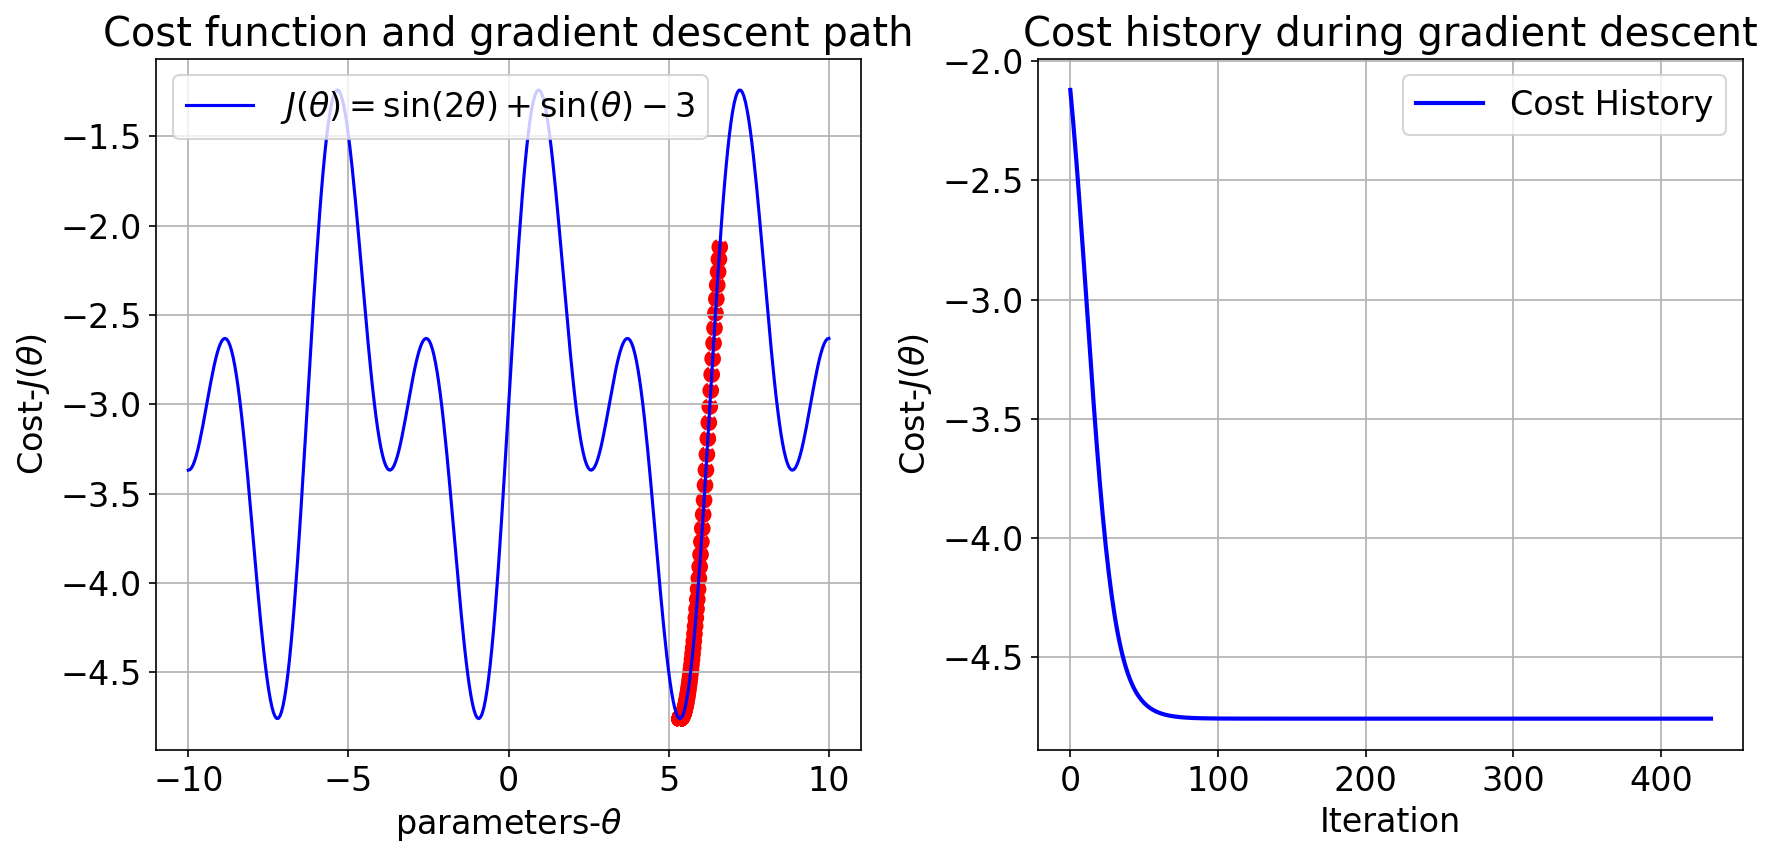

Best theta: 5.34725585358861
Final cost value: -4.760172593046087
Theta history for the best run: [6.590954376244969, 6.565095001697945, 6.538585339795876, 6.511462643582706, 6.483770532340029, 6.455558939535213, 6.426883917458181, 6.397807288380479, 6.368396137957107, 6.338722153591942, 6.3088608181974575, 6.278890477656375, 6.248891307701926, 6.218944212214392, 6.189129689480493, 6.159526705312248, 6.130211611812231, 6.101257147987431, 6.07273155359122, 6.044697820968476, 6.017213101906165, 5.990328278238554, 5.964087696897928, 5.938529062825093, 5.913683477101115, 5.889575603102825, 5.866223940515383, 5.843641185598739, 5.821834656026406, 5.8008067596442645, 5.7805554883492, 5.7610749206773155, 5.742355719360717, 5.724385612843848, 5.707149852378259, 5.690631638721396, 5.674812514578715, 5.659672720714971, 5.6451915151153615, 5.631347455716256, 5.618118648078382, 5.605482959979477, 5.593418205298298, 5.581902299786614, 5.570913391416537, 5.560429967979561, 5.550430944528319, 5.54089

In [245]:

# Visualization
plt.figure(figsize=(12, 6))

# Plot the cost function and gradient descent path
plt.subplot(1, 2, 1)
plt.plot(theta, cost_values, label='$J(\\theta)=\sin(2\\theta) + \sin(\\theta) - 3$', color='b')
plt.scatter(best_theta_his, best_cost_his, color='red', linestyle='--', lw=2)
plt.xlabel('parameters-$\\theta$')
plt.ylabel('Cost-$J(\\theta)$')
plt.title('Cost function and gradient descent path')
plt.legend()
plt.grid(True)

# Plot the cost history during gradient descent
plt.subplot(1, 2, 2)
plt.plot(best_cost_his, label='Cost History', color='b', lw=2)
plt.xlabel('Iteration')
plt.ylabel('Cost-$J(\\theta)$')
plt.title('Cost history during gradient descent')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Output the best theta and its corresponding final cost value
best_theta = best_theta_his[-1]
final_cost_value = cost_func(best_theta)
print(f"Best theta: {best_theta}")
print(f"Final cost value: {final_cost_value}")

# Optionally, if you want to print the history of theta and cost for the best run
print("Theta history for the best run:", best_theta_his)
print("Cost history for the best run:", best_cost_his)